In [1]:
#import library
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray 
import numpy as np

Shape citra 1 :  (393, 700, 3)
Shape citra 2 :  (2976, 4167, 3)


Text(0.5, 1.0, 'Citra 2')

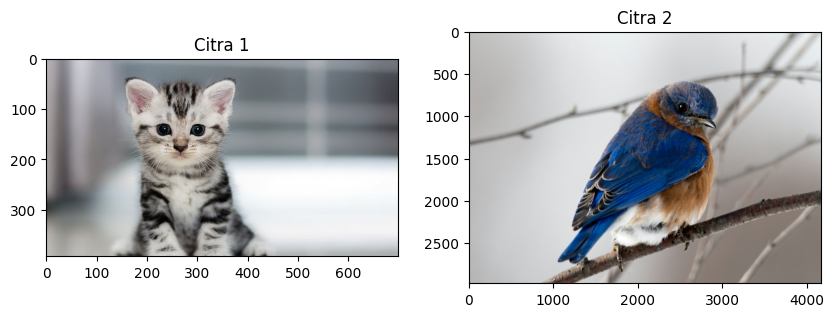

In [2]:
#Load & Plot Input Image
# membaca gambar di folder
citra1 = imread(fname="kucing.jpg")
citra2 = imread(fname="burung.jpg")

# menampilkan dimensi citra 1 dan 2
print('Shape citra 1 : ', citra1.shape)
print('Shape citra 2 : ', citra2.shape)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Citra 1")
ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Citra 2")

In [3]:
#Menyiapkan variable output
# untuk mengcopy citra 1 dan 2 dengan tipe data float
copyCitra1 = citra1.copy().astype(float)
copyCitra2 = citra2.copy().astype(float)

# untuk mendapatkan dimensi citra 1 dan menginisialisasi output 1
m1,n1 = copyCitra1.shape[:2]
output1 = np.empty([m1, n1])

#  untuk mendapatkan dimensi citra 1 dan menginisialisasi output 1
m2,n2 = copyCitra2.shape[:2]
output2 = np.empty([m2, n2])

# menampilkan dimensi copycitra1 dan output1
print('Shape copy citra 1 : ', copyCitra1.shape)
print('Shape output citra 1 : ', output1.shape)
print('m1 : ',m1)
print('n1 : ',n1)
print()

# menampilkan dimensi copycitra2 dan output2
print('Shape copy citra 2 : ', copyCitra2.shape)
print('Shape output citra 3 : ', output2.shape)
print('m2 : ',m2)
print('n2 : ',n2)
print()

Shape copy citra 1 :  (393, 700, 3)
Shape output citra 1 :  (393, 700)
m1 :  393
n1 :  700

Shape copy citra 2 :  (2976, 4167, 3)
Shape output citra 3 :  (2976, 4167)
m2 :  2976
n2 :  4167



In [4]:
#Proses Filter Batas Pada Citra Input 1
# melakukan looping untuk setiap posisi baris dan kolom pada citra 1
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        
        a1 = baris
        b1 = kolom
        
        # membentuk array arr dengan nilai piksel sekitar
        arr = np.array([copyCitra1[a1-1, b1-1], copyCitra1[a1-1, b1], copyCitra1[a1, b1+1], \
            copyCitra1[a1, b1-1], copyCitra1[a1, b1+1], copyCitra1[a1+1, b1-1],  \
            copyCitra1[a1+1, b1], copyCitra1[a1+1, b1+1]])
        
        # menentukan nilai piksel minimum dan maksimum
        minPiksel = np.min(arr)
        maksPiksel = np.max(arr)

         # memeriksa kondisi untuk menentukan nilai piksel output1[baris, kolom]   
        if np.all(copyCitra1[baris, kolom] < minPiksel):
            output1[baris, kolom] = minPiksel
        else:
            if np.any(copyCitra1[baris, kolom] > maksPiksel):
                output1[baris, kolom] = maksPiksel
            else:
                output1[baris, kolom] = copyCitra1[baris, kolom][0]

In [5]:
#Proses Filter Batas Pada Citra Input 2
# melakukan looping untuk setiap posisi baris dan kolom pada citra 2
for baris1 in range(0, m2-1):
    for kolom1 in range(0, n2-1):
        
        a1 = baris1
        b1 = kolom1
        
        # membentuk array arr dengan nilai piksel sekitar
        arr = np.array([copyCitra2[a1-1, b1-1], copyCitra2[a1-1, b1], copyCitra2[a1, b1+1], \
            copyCitra2[a1, b1-1], copyCitra2[a1, b1+1], copyCitra2[a1+1, b1-1],  \
            copyCitra2[a1+1, b1], copyCitra2[a1+1, b1+1]])
        

        # menentukan nilai piksel minimum dan maksimum
        minPiksel = np.amin(arr);        
        maksPiksel = np.amax(arr);    

        # memeriksa kondisi untuk menentukan nilai piksel output1[baris, kolom]     
        if np.all(copyCitra2[baris1, kolom1] < minPiksel):
            output2[baris1, kolom1] = minPiksel
        else:
            if np.any(copyCitra2[baris1, kolom1] > maksPiksel):
                output2[baris1, kolom1] = maksPiksel
            else:
                output2[baris1, kolom1] = copyCitra2[baris1, kolom1][0]

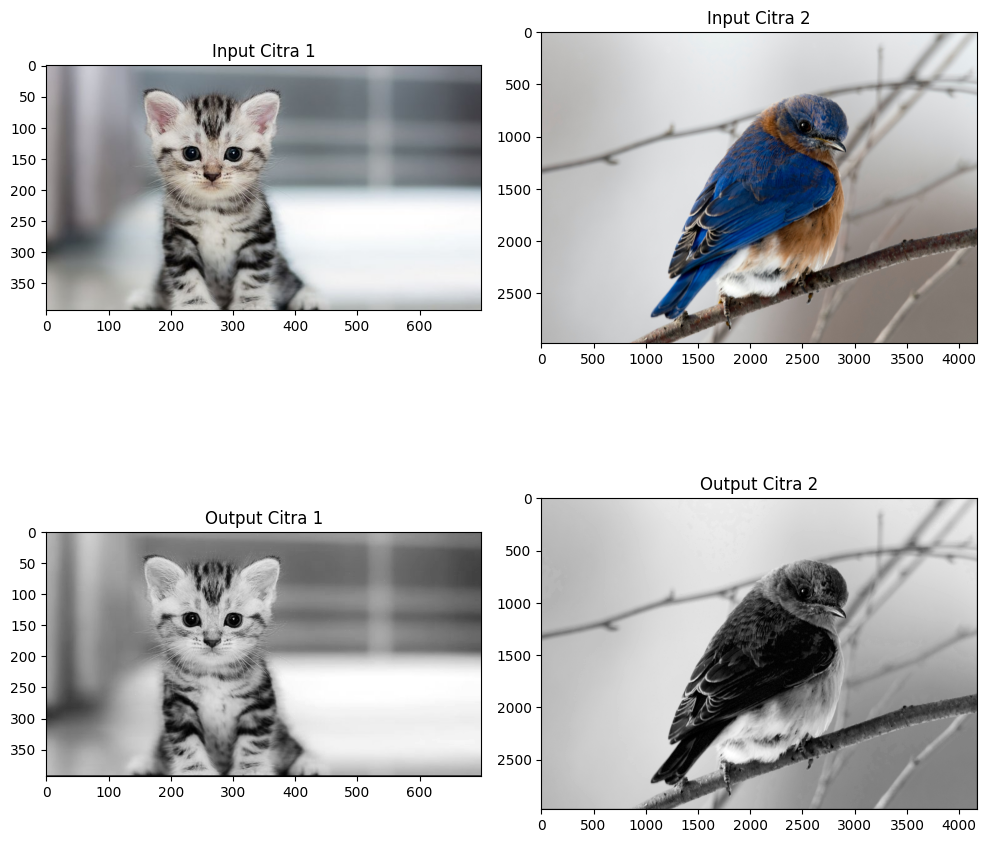

In [6]:
#Plot Citra Input dan Output Hasil dari Filter Batas
# membuat sebuah gambar dengan ukuran 10x10 dan axes 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.ravel()

# menampilkan input dan output citra 1 dan 2
ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Input Citra 1")

ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Input Citra 2")

ax[2].imshow(output1, cmap = 'gray')
ax[2].set_title("Output Citra 1")

ax[3].imshow(output2, cmap = 'gray')
ax[3].set_title("Output Citra 2")

fig.tight_layout()